In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

### Uploading data containing daily stock prices of 4 major banks(Morgan Stanley, Citi, JPMorgan Chase, Goldman Sachs) during period before, during and after Financial Crisis of 2008

In [2]:
df1 = pd.read_csv("Financial_Stocks.csv")

In [3]:
df = df1.copy()

### Data Preprocessing

In [4]:
df.head(10)

,Date,Close_MS,Close_Citi,JPM_Close,GS_Close
0,03-01-2007,81.620003,552.500000,48.070000,200.720001
1,04-01-2007,81.910004,550.599976,48.189999,198.850006
2,05-01-2007,80.860001,547.700012,47.790001,199.050003
3,08-01-2007,81.349998,550.500000,47.950001,203.729996
4,09-01-2007,81.160004,545.700012,47.750000,204.080002
5,10-01-2007,81.570000,541.299988,48.099998,208.110001
6,11-01-2007,82.370003,541.700012,48.310001,211.880005
7,12-01-2007,82.860001,543.799988,47.990002,213.990005
8,16-01-2007,82.610001,547.700012,48.389999,213.589996
9,17-01-2007,82.379997,543.900024,48.430000,213.229996


In [5]:
df.isna().sum()

Date          0
Close_MS      0
Close_Citi    0
JPM_Close     0
GS_Close      0
dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df = df.set_index('Date')

In [8]:
df4 = df.copy()

In [9]:
df.head(3)

,Close_MS,Close_Citi,JPM_Close,GS_Close
Date,,,,
2007-03-01,81.620003,552.500000,48.070000,200.720001
2007-04-01,81.910004,550.599976,48.189999,198.850006
2007-05-01,80.860001,547.700012,47.790001,199.050003


In [10]:
df.describe()

,Close_MS,Close_Citi,JPM_Close,GS_Close
count,1007.000000,1007.000000,1007.000000,1007.000000
mean,40.228898,186.092056,40.848590,164.917607
std,20.498821,185.851510,6.746547,40.236383
min,9.200000,10.200000,15.900000,52.000000
25%,26.000000,39.099998,37.730002,144.930001
50%,30.790001,65.199997,41.529999,166.750000
75%,49.979999,292.550003,45.330000,190.285004
max,89.300003,552.500000,53.200001,247.919998


Text(0.5, 1.0, 'Close Price of 4 major price during financial crisis')

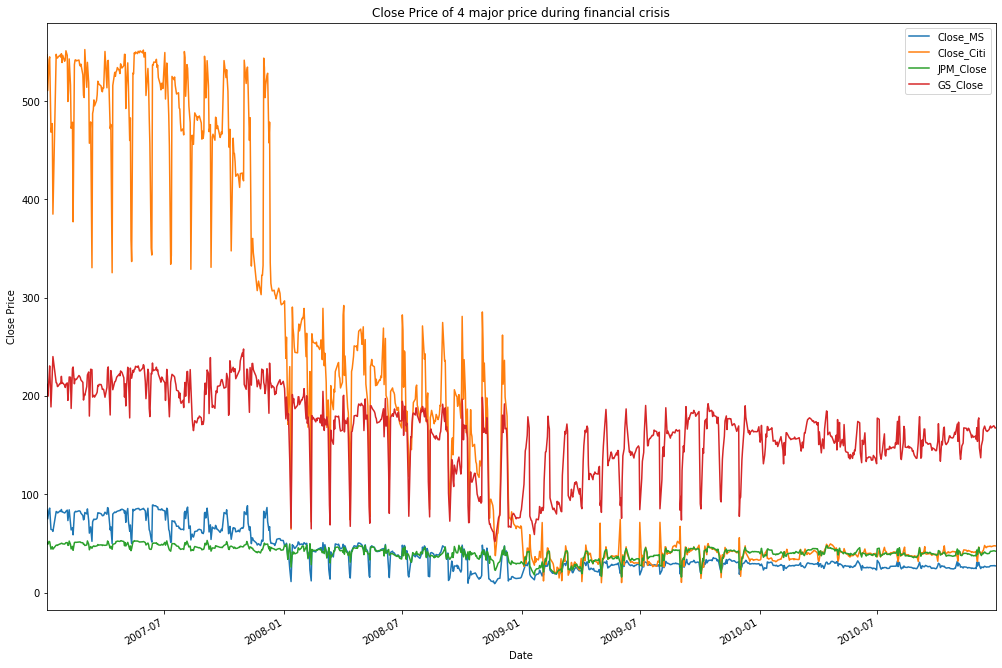

In [11]:
# from 2007 - 2010
df.plot(legend = 'MS',figsize=(17,12))
plt.ylabel("Close Price")
plt.title('Close Price of 4 major price during financial crisis')

### Quantifying Return (Taking log returns in place of close prices due to high autocorrelation in prices)

In [12]:
df['Lag_MS'] = df['Close_MS'].shift(1)
df['Return_MS'] = np.log(df['Close_MS']/df['Lag_MS'])
df['Lag_Citi'] = df['Close_Citi'].shift(1)
df['Return_Citi'] = np.log(df['Close_Citi']/df['Lag_Citi'])
df['Lag_JPM'] = df['JPM_Close'].shift(1)
df['Return_JPM'] = np.log(df['JPM_Close']/df['Lag_JPM'])
df['Lag_GS'] = df['GS_Close'].shift(1)
df['Return_GS'] = np.log(df['GS_Close']/df['Lag_GS'])

In [13]:
df.head(10)

,Close_MS,Close_Citi,JPM_Close,GS_Close,Lag_MS,Return_MS,Lag_Citi,Return_Citi,Lag_JPM,Return_JPM,Lag_GS,Return_GS
Date,,,,,,,,,,,,
2007-03-01,81.620003,552.500000,48.070000,200.720001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-01,81.910004,550.599976,48.189999,198.850006,81.620003,0.003547,552.500000,-0.003445,48.070000,0.002493,200.720001,-0.009360
2007-05-01,80.860001,547.700012,47.790001,199.050003,81.910004,-0.012902,550.599976,-0.005281,48.189999,-0.008335,198.850006,0.001005
2007-08-01,81.349998,550.500000,47.950001,203.729996,80.860001,0.006042,547.700012,0.005099,47.790001,0.003342,199.050003,0.023240
2007-09-01,81.160004,545.700012,47.750000,204.080002,81.349998,-0.002338,550.500000,-0.008758,47.950001,-0.004180,203.729996,0.001717
2007-10-01,81.570000,541.299988,48.099998,208.110001,81.160004,0.005039,545.700012,-0.008096,47.750000,0.007303,204.080002,0.019555
2007-11-01,82.370003,541.700012,48.310001,211.880005,81.570000,0.009760,541.299988,0.000739,48.099998,0.004356,208.110001,0.017953
2007-12-01,82.860001,543.799988,47.990002,213.990005,82.370003,0.005931,541.700012,0.003869,48.310001,-0.006646,211.880005,0.009909
2007-01-16,82.610001,547.700012,48.389999,213.589996,82.860001,-0.003022,543.799988,0.007146,47.990002,0.008300,213.990005,-0.001871


In [14]:
df1 = df.drop(['Lag_Citi','Lag_MS','Lag_JPM','Lag_GS'],axis=1)

In [15]:
df1.head(10)

,Close_MS,Close_Citi,JPM_Close,GS_Close,Return_MS,Return_Citi,Return_JPM,Return_GS
Date,,,,,,,,
2007-03-01,81.620003,552.500000,48.070000,200.720001,NaN,NaN,NaN,NaN
2007-04-01,81.910004,550.599976,48.189999,198.850006,0.003547,-0.003445,0.002493,-0.009360
2007-05-01,80.860001,547.700012,47.790001,199.050003,-0.012902,-0.005281,-0.008335,0.001005
2007-08-01,81.349998,550.500000,47.950001,203.729996,0.006042,0.005099,0.003342,0.023240
2007-09-01,81.160004,545.700012,47.750000,204.080002,-0.002338,-0.008758,-0.004180,0.001717
2007-10-01,81.570000,541.299988,48.099998,208.110001,0.005039,-0.008096,0.007303,0.019555
2007-11-01,82.370003,541.700012,48.310001,211.880005,0.009760,0.000739,0.004356,0.017953
2007-12-01,82.860001,543.799988,47.990002,213.990005,0.005931,0.003869,-0.006646,0.009909
2007-01-16,82.610001,547.700012,48.389999,213.589996,-0.003022,0.007146,0.008300,-0.001871


In [16]:
df2 = df1.drop(['Close_MS','Close_Citi','GS_Close','JPM_Close'],axis=1)

In [17]:
df2.head(3)

,Return_MS,Return_Citi,Return_JPM,Return_GS
Date,,,,
2007-03-01,NaN,NaN,NaN,NaN
2007-04-01,0.003547,-0.003445,0.002493,-0.009360
2007-05-01,-0.012902,-0.005281,-0.008335,0.001005


In [18]:
df3 = df2.copy()

In [19]:
df3.head(10)

,Return_MS,Return_Citi,Return_JPM,Return_GS
Date,,,,
2007-03-01,NaN,NaN,NaN,NaN
2007-04-01,0.003547,-0.003445,0.002493,-0.009360
2007-05-01,-0.012902,-0.005281,-0.008335,0.001005
2007-08-01,0.006042,0.005099,0.003342,0.023240
2007-09-01,-0.002338,-0.008758,-0.004180,0.001717
2007-10-01,0.005039,-0.008096,0.007303,0.019555
2007-11-01,0.009760,0.000739,0.004356,0.017953
2007-12-01,0.005931,0.003869,-0.006646,0.009909
2007-01-16,-0.003022,0.007146,0.008300,-0.001871


In [20]:
df3.describe()

,Return_MS,Return_Citi,Return_JPM,Return_GS
count,1006.000000,1006.000000,1006.000000,1006.000000
mean,-0.001088,-0.002437,-0.000129,-0.000179
std,0.050088,0.055804,0.038660,0.034413
min,-0.299658,-0.494696,-0.232278,-0.210223
25%,-0.017359,-0.019913,-0.014983,-0.014181
50%,-0.000438,-0.002031,-0.000722,-0.000541
75%,0.015981,0.015767,0.014002,0.015563
max,0.625850,0.456316,0.223917,0.234818


### Considering equal weightage to each asset in a portfolio

In [21]:
returns = df3.copy()

In [22]:
w = (0.25,0.25,0.25,0.25)

In [23]:
# Multilying weight vector with returns vector to calculate portfolio returns
portfolio_returns = returns.dot(w)

In [24]:
portfolio_returns.head(10)

Date
2007-03-01         NaN
2007-04-01   -0.001691
2007-05-01   -0.006378
2007-08-01    0.009431
2007-09-01   -0.003390
2007-10-01    0.005950
2007-11-01    0.008202
2007-12-01    0.003266
2007-01-16    0.002638
2007-01-17   -0.002653
dtype: float64

In [25]:
# -ve returns are losses and +ve returns a are profit

In [26]:
type(portfolio_returns)

pandas.core.series.Series

### Pandas Series Object to Pandas Dataframe

In [27]:
portfolio_returns_new = pd.Series(portfolio_returns)
print (portfolio_returns_new)

Date
2007-03-01         NaN
2007-04-01   -0.001691
2007-05-01   -0.006378
2007-08-01    0.009431
2007-09-01   -0.003390
                ...   
2010-12-23   -0.006006
2010-12-27    0.012458
2010-12-28    0.000587
2010-12-29   -0.007769
2010-12-30   -0.000820
Length: 1007, dtype: float64


In [28]:
df = portfolio_returns_new.to_frame()

In [29]:
df = df.rename(columns={0: "returns"})

In [30]:
df.head(10)

,returns
Date,
2007-03-01,NaN
2007-04-01,-0.001691
2007-05-01,-0.006378
2007-08-01,0.009431
2007-09-01,-0.003390
2007-10-01,0.005950
2007-11-01,0.008202
2007-12-01,0.003266
2007-01-16,0.002638


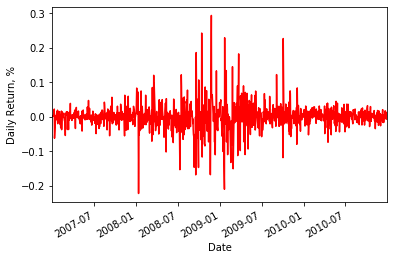

In [31]:
portfolio_returns.plot(color='red').set_ylabel("Daily Return, %")
plt.show()

In [32]:
# The asset prices plot shows how the global financial crisis created a loss in confidence in investment banks from September 2008
# . There was an event during September that precipitated this decline. The 'spikiness' of portfolio returns indicates how 
# uncertain and volatile asset returns became.

In [33]:
portfolio_returns_percent = portfolio_returns*100

#### Above graph shows very high volatility from July 2008 to July 2009 

### Quantifying Portfolio Risk using Variance Covariance (Parametric Estimation)

In [34]:
covar = df3.cov()

#### Correlation in Percentage

In [35]:
print(covar)

             Return_MS  Return_Citi  Return_JPM  Return_GS
Return_MS     0.002509     0.001695    0.001241   0.001392
Return_Citi   0.001695     0.003114    0.001531   0.001213
Return_JPM    0.001241     0.001531    0.001495   0.000967
Return_GS     0.001392     0.001213    0.000967   0.001184


In [36]:
# Annualize the covariance using 252 trading days per year
covar_ann = covar*252

In [37]:
print(covar_ann)

             Return_MS  Return_Citi  Return_JPM  Return_GS
Return_MS     0.632212     0.427139    0.312773   0.350865
Return_Citi   0.427139     0.784763    0.385937   0.305634
Return_JPM    0.312773     0.385937    0.376631   0.243584
Return_GS     0.350865     0.305634    0.243584   0.298430


In [38]:
portfolio_variance = np.transpose(w)@covar_ann@w

In [39]:
portfolio_volatility = np.sqrt(portfolio_variance)

In [40]:
print(portfolio_volatility)

0.6196722286680826


In [41]:
# Portfolio has 61% volatilily

In [42]:
#The volatility of a portfolio of stocks is a measure of how wildly the total value of all the stocks in that portfolio
# appreciates or declines.

# Rolling Volatility

In [43]:
windowed = df.rolling(30)

In [44]:
volatility = windowed.std()*np.sqrt(252)

Text(0, 0.5, 'Annualized Volatility, 30-day Window')

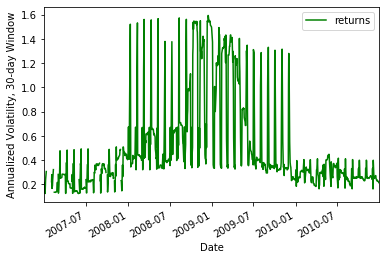

In [45]:
volatility.plot(color = 'green').set_ylabel("Annualized Volatility, 30-day Window")

In [46]:
df.head(10)

,returns
Date,
2007-03-01,NaN
2007-04-01,-0.001691
2007-05-01,-0.006378
2007-08-01,0.009431
2007-09-01,-0.003390
2007-10-01,0.005950
2007-11-01,0.008202
2007-12-01,0.003266
2007-01-16,0.002638


# Risk Factors

### Variables or events that drive portfolio return and volatility

In [47]:
# Two types of risk factors are:
#     1. Systematic Risk
#     2. Idisyncratic Risk
# # Systematic Risk
# Systematic risk is inherent to the market as a whole, reflecting the impact of economic, geo-political and financial factors.
# This type of risk is distinguished from unsystematic risk, which impacts a specific industry or security.
# Investors can somewhat mitigate the impact of systematic risk by building a diversified portfolio.
# Ex: interest rate changes, inflation, recessions, and wars, among other major changes.
    
# # Idiosyncratic Risk
# Idiosyncratic risk refers to the inherent factors that can negatively impact individual securities or a very specific group of assets.
# The opposite of Idiosyncratic risk is a systematic risk, which refers to broader trends that impact the overall financial system or a very broad market.
# Idiosyncratic risk can generally be mitigated in an investment portfolio through the use of diversification
# Idiosyncratic risk is a type of investment risk that is endemic to an individual asset (like a particular company's stock),
# or a group of assets (like a particular sector's stocks), or in some cases, a very specific asset class (like collateralized mortgage obligations). 

# Idiosyncratic Risk vs. Systematic Risk
# While idiosyncratic risk is, by definition, irregular and unpredictable, studying a company or industry can help an 
# investor to identify and anticipate—in a general way—its idiosyncratic risks. Idiosyncratic risk is also highly individual, 
# even unique in some cases. It can, therefore, be substantially mitigated or eliminated from a portfolio by using adequate 
# diversification. Proper asset allocation, along with hedging strategies, can minimize its negative impact on an investment 
# portfolio by diversification or hedging.
# In contrast, systematic risk cannot be mitigated just by adding more assets to an investment portfolio. This market risk 
# cannot be eliminated by adding stocks of various sectors to one's holdings. These broader types of risk reflect the 
# macroeconomic factors that affect not just a single asset but other assets like it and greater markets and economies as well.

### Factor Models

In [48]:
# Factor models assess on which risk factors asset returns or volatility are mostly dependent.
# We can model theses factors using :
#     1. Ordinary Least Square - Regression Model - 
#        dependent variable - Asset returns/volatility
#        independent variable - risk factors
#     2. Fama French Model - combination of market risk and idiosyncratic risk (firm size and value)

In [49]:
# Considering MBS(Mortgage Backed Security) 90 days mortgage Delinquency as a risk factor which caused the bankcruptcy of
# Lehman Brothers. Risk factor delinquency rate was highly correlated with the returns.

In [50]:
# Risk factor models often rely upon data that is of different frequencies. A typical example is when using quarterly
# macroeconomic data, such as prices, unemployment rates.
# here also delinquency rate is taken for 90 days (1 Q) so sampling returns for quarter

In [51]:
returns_avg = df.resample('Q').mean()

In [52]:
returns_avg.tail()

,returns
Date,
2009-12-31,-0.000281
2010-03-31,0.002696
2010-06-30,-0.001822
2010-09-30,0.000906
2010-12-31,-0.000570


In [53]:
# Now convert daily returns to weekly minimum returns
returns_min = df.resample('Q').min()
returns_min.head()

,returns
Date,
2007-03-31,-0.062338
2007-06-30,-0.041614
2007-09-30,-0.055136
2007-12-31,-0.055454
2008-03-31,-0.222164


In [54]:
delin = pd.read_csv("Delinq_rate.csv")

In [55]:
returns_avg.describe()

,returns
count,16.000000
mean,-0.000972
std,0.003676
min,-0.007180
25%,-0.002282
50%,-0.000641
75%,0.000821
max,0.005121


In [56]:
delin.describe()

,Delinq_Rate
count,16.000000
mean,0.073975
std,0.033431
min,0.023100
25%,0.042025
50%,0.082700
75%,0.103525
max,0.115400


Text(0, 0.5, 'Delinquency rate, decimal %')

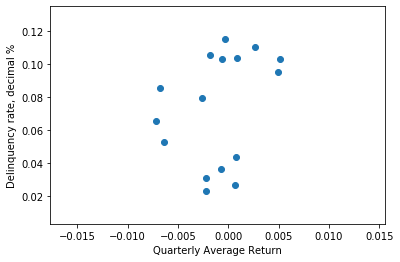

In [57]:
plt.scatter(returns_avg,delin['Delinq_Rate'])
plt.xlabel("Quarterly Average Return")
plt.ylabel("Delinquency rate, decimal %")

Text(0, 0.5, 'Delinquency rate, decimal %')

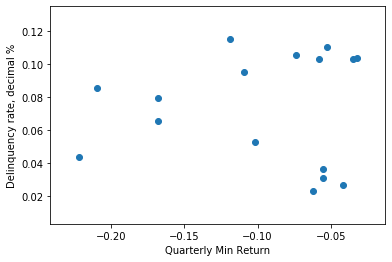

In [58]:
plt.scatter(returns_min,delin['Delinq_Rate'])
plt.xlabel("Quarterly Min Return")
plt.ylabel("Delinquency rate, decimal %")

In [59]:
# # Initial assessment indicates that there is little correlation between average returns and mortgage delinquencies, 
# but a stronger negative correlation exists between minimum returns and delinquency. In the following exercises we'll
# quantify this using least-squares regression.

In [60]:
delin.head()

,Date,Delinq_Rate
0,31-03-2007,0.0231
1,30-06-2007,0.0271
2,30-09-2007,0.0309
3,31-12-2007,0.0367
4,31-03-2008,0.0438


In [61]:
delin['Date'] = pd.to_datetime(delin['Date'])
delin = delin.set_index('Date')

In [62]:
delin.head()

,Delinq_Rate
Date,
2007-03-31,0.0231
2007-06-30,0.0271
2007-09-30,0.0309
2007-12-31,0.0367
2008-03-31,0.0438


In [63]:
# Crisis Factor Model (OLS) LEFT to study
import statsmodels.api as sm


In [64]:
regression = sm.OLS(returns_avg,delin['Delinq_Rate']).fit()

In [65]:
print(regression.summary())

                                 OLS Regression Results                                
Dep. Variable:                returns   R-squared (uncentered):                   0.015
Model:                            OLS   Adj. R-squared (uncentered):             -0.051
Method:                 Least Squares   F-statistic:                             0.2271
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                       0.641
Time:                        12:06:03   Log-Likelihood:                          67.052
No. Observations:                  16   AIC:                                     -132.1
Df Residuals:                      15   BIC:                                     -131.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

C:\Users\TAN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=16



In [66]:
regression_qmin = sm.OLS(returns_min,delin['Delinq_Rate']).fit()

In [67]:
print(regression_qmin.summary())

                                 OLS Regression Results                                
Dep. Variable:                returns   R-squared (uncentered):                   0.594
Model:                            OLS   Adj. R-squared (uncentered):              0.567
Method:                 Least Squares   F-statistic:                              21.92
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    0.000295
Time:                        12:06:03   Log-Likelihood:                          19.097
No. Observations:                  16   AIC:                                     -36.19
Df Residuals:                      15   BIC:                                     -35.42
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [68]:
# Now convert daily returns to weekly minimum returns
returns_vol = df.resample('Q').std()
returns_vol.head()

,returns
Date,
2007-03-31,0.017870
2007-06-30,0.014345
2007-09-30,0.019091
2007-12-31,0.021575
2008-03-31,0.046946


In [69]:
regression_vol = sm.OLS(returns_vol,delin['Delinq_Rate']).fit()

In [70]:
print(regression_vol.summary())

                                 OLS Regression Results                                
Dep. Variable:                returns   R-squared (uncentered):                   0.657
Model:                            OLS   Adj. R-squared (uncentered):              0.634
Method:                 Least Squares   F-statistic:                              28.68
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    8.01e-05
Time:                        12:06:08   Log-Likelihood:                          37.712
No. Observations:                  16   AIC:                                     -73.42
Df Residuals:                      15   BIC:                                     -72.65
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

### As seen from the regressions, mortgage delinquencies are acting as a systematic risk factor for both minimum quarterly returns and average volatility of returns, but not for average quarterly returns. The R-squared goodness of fit isn't high in any case, but a model with more factors would likely generate greater explanatory power.

In [71]:
##R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the 
##independent variable(s) in a regression model.

# Modern Portfolio Theory

### What maximum return an investor can expect as per given risk apetite calculated from the portfolio volatility
### Import the mean_historical_return method

### Eficient Portfolio -  portfolio with weights generating highest expected return for given level of risk

### Efficient Frontier - locus of (risk,return) pairs created by efficient portfolio

In [72]:
# pip install pyportfolioopt

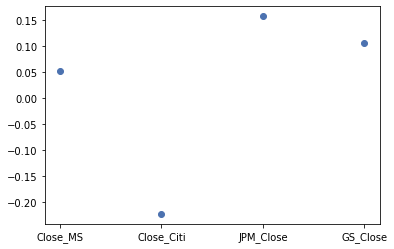

In [73]:
from pypfopt.expected_returns import mean_historical_return

# Compute the annualized average historical return
mean_returns = mean_historical_return(df4, frequency = 252)

# Plot the annualized average historical return
plt.plot(mean_returns, linestyle = 'None', marker = 'o')
plt.show()

In [74]:
mean_returns.head()

Close_MS      0.051932
Close_Citi   -0.222364
JPM_Close     0.156725
GS_Close      0.104710
dtype: float64

In [75]:
# The average historical return is usually available as a proxy for expected returns, but is not always accurate--a more 
# thorough estimate of expected returns requires an assumption about the return distribution, which we'll discuss in the context
# of Loss Distributions later in the course.

In [76]:
df4.head(10)

,Close_MS,Close_Citi,JPM_Close,GS_Close
Date,,,,
2007-03-01,81.620003,552.500000,48.070000,200.720001
2007-04-01,81.910004,550.599976,48.189999,198.850006
2007-05-01,80.860001,547.700012,47.790001,199.050003
2007-08-01,81.349998,550.500000,47.950001,203.729996
2007-09-01,81.160004,545.700012,47.750000,204.080002
2007-10-01,81.570000,541.299988,48.099998,208.110001
2007-11-01,82.370003,541.700012,48.310001,211.880005
2007-12-01,82.860001,543.799988,47.990002,213.990005
2007-01-16,82.610001,547.700012,48.389999,213.589996


In [77]:
# Import the CovarianceShrinkage object, it reduces/shrinks the errors/residuals while calculating the covariance matrix
from pypfopt.risk_models import CovarianceShrinkage

# Create the CovarianceShrinkage instance variable
cs = CovarianceShrinkage(df4)

In [78]:
# Difference in calculating covariance matrix through covariance shrinkage and through sample cov() method
# Compute the sample covariance matrix of returns
sample_cov = df4.pct_change().cov() * 252

# Compute the efficient covariance matrix of returns
e_cov = cs.ledoit_wolf()

# Display both the sample covariance_matrix and the efficient e_cov estimate
print("Sample Covariance Matrix\n", sample_cov, "\n")
print("Efficient Covariance Matrix\n", e_cov, "\n")

Sample Covariance Matrix
             Close_MS  Close_Citi  JPM_Close  GS_Close
Close_MS    0.717102    0.450956   0.319404  0.372737
Close_Citi  0.450956    0.796039   0.398215  0.320531
JPM_Close   0.319404    0.398215   0.384847  0.247412
GS_Close    0.372737    0.320531   0.247412  0.304432 

Efficient Covariance Matrix
             Close_MS  Close_Citi  JPM_Close  GS_Close
Close_MS    0.707324    0.425953   0.301695  0.352071
Close_Citi  0.425953    0.781884   0.376136  0.302760
JPM_Close   0.301695    0.376136   0.393490  0.233695
GS_Close    0.352071    0.302760   0.233695  0.317534 



In [79]:
# Although the differences between the sample covariance and the efficient covariance (found by shrinking errors) 
# may seem small, they have a huge impact on estimation of the optimal portfolio weights and the generation of the efficient 
# frontier. Practitioners generally use some form of efficient covariance for Modern Portfolio Theory.

In [80]:
df4.head()

,Close_MS,Close_Citi,JPM_Close,GS_Close
Date,,,,
2007-03-01,81.620003,552.500000,48.070000,200.720001
2007-04-01,81.910004,550.599976,48.189999,198.850006
2007-05-01,80.860001,547.700012,47.790001,199.050003
2007-08-01,81.349998,550.500000,47.950001,203.729996
2007-09-01,81.160004,545.700012,47.750000,204.080002


In [81]:
# Create a dictionary of time periods (or 'epochs')
epochs = { 'during' : {'start': '1-1-2007', 'end': '31-12-2008'},
           'after'  : {'start': '1-1-2009', 'end': '31-12-2010'}
         }

# Compute the efficient covariance for each epoch
e_cov = {}
for x in epochs.keys():
    sub_price = df4.loc[epochs[x]['start']:epochs[x]['end']]
    e_cov[x] = CovarianceShrinkage(sub_price).ledoit_wolf()

# Display the efficient covariance matrices for all epochs
print("Efficient Covariance Matrices\n", e_cov)


Efficient Covariance Matrices
 {'during':             Close_MS  Close_Citi  JPM_Close  GS_Close
Close_MS    0.994390    0.465336   0.298613  0.434874
Close_Citi  0.465336    0.713035   0.364848  0.323977
JPM_Close   0.298613    0.364848   0.422516  0.224668
GS_Close    0.434874    0.323977   0.224668  0.408773, 'after':             Close_MS  Close_Citi  JPM_Close  GS_Close
Close_MS    0.388839    0.344939   0.279727  0.231624
Close_Citi  0.344939    0.841156   0.356788  0.252684
JPM_Close   0.279727    0.356788   0.382494  0.223740
GS_Close    0.231624    0.252684   0.223740  0.244539}


In [82]:
df3.head()

,Return_MS,Return_Citi,Return_JPM,Return_GS
Date,,,,
2007-03-01,NaN,NaN,NaN,NaN
2007-04-01,0.003547,-0.003445,0.002493,-0.009360
2007-05-01,-0.012902,-0.005281,-0.008335,0.001005
2007-08-01,0.006042,0.005099,0.003342,0.023240
2007-09-01,-0.002338,-0.008758,-0.004180,0.001717


In [83]:
# Great! The breakdown of the 2007 - 2010 period into sub-periods shows how the portfolio's risk increased during the crisis
# , and this changed the risk-return trade-off after the crisis. For future reference, also note that although we used a loop
# in this exercise, a dictionary comprehension could also have been used to create the efficient covariance matrix.

In [84]:
from pypfopt import CLA

In [85]:
# Create a dictionary of time periods (or 'epochs')
epochs = { 'during' : {'start': '1-1-2007', 'end': '31-12-2008'}}

# Compute the efficient covariance for each epoch
e_cov_during = {}
for x in epochs.keys():
    sub_price = df4.loc[epochs[x]['start']:epochs[x]['end']]
    e_cov_during[x] = CovarianceShrinkage(sub_price).ledoit_wolf()

# Display the efficient covariance matrices for all epochs
print("Efficient Covariance Matrices\n", e_cov_during)


Efficient Covariance Matrices
 {'during':             Close_MS  Close_Citi  JPM_Close  GS_Close
Close_MS    0.994390    0.465336   0.298613  0.434874
Close_Citi  0.465336    0.713035   0.364848  0.323977
JPM_Close   0.298613    0.364848   0.422516  0.224668
GS_Close    0.434874    0.323977   0.224668  0.408773}


## Efficient Distirbution through distribution

In [86]:
portfolio_returns = []
portfolio_volatility = []
for x in range(1000):
    weights = np.random.random(4)
    weights/=np.sum(weights)
    portfolio_returns.append(np.sum(weights*df3.mean()) * 250)
    portfolio_volatility.append(np.sqrt(np.dot(weights.T,np.dot(df3.cov()*250,weights))))
pfolio_returns = np.array(portfolio_returns)
pfolio_voaltility = np.array(portfolio_volatility)

In [87]:
portfolios = pd.DataFrame({'Return':pfolio_returns,'volatility':pfolio_voaltility})

In [88]:
portfolios.head()

,Return,volatility
0,-0.143256,0.607611
1,-0.254422,0.609405
2,-0.206959,0.651010
3,-0.265134,0.626084
4,-0.281374,0.640495


In [89]:
portfolios.tail()

,Return,volatility
995,-0.325644,0.688168
996,-0.209610,0.595257
997,-0.282458,0.633441
998,-0.236581,0.634376
999,-0.238879,0.597135


Text(0, 0.5, 'Return')

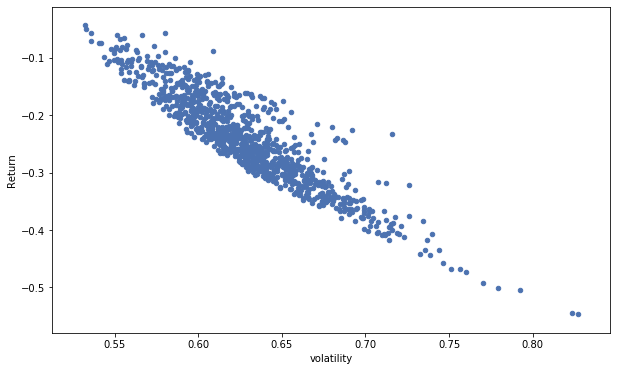

In [90]:
portfolios.plot(x='volatility',y='Return',kind='scatter',figsize=(10,6))
plt.xlabel('volatility')
plt.ylabel('Return')

In [91]:
df3.head()

,Return_MS,Return_Citi,Return_JPM,Return_GS
Date,,,,
2007-03-01,NaN,NaN,NaN,NaN
2007-04-01,0.003547,-0.003445,0.002493,-0.009360
2007-05-01,-0.012902,-0.005281,-0.008335,0.001005
2007-08-01,0.006042,0.005099,0.003342,0.023240
2007-09-01,-0.002338,-0.008758,-0.004180,0.001717


In [92]:
df6=df3.loc['2007-03-01':'2008-12-31']


In [93]:
df6.tail()

,Return_MS,Return_Citi,Return_JPM,Return_GS
Date,,,,
2008-12-24,0.004147,0.039103,0.025103,0.016355
2008-12-26,0.010292,-0.007402,-0.001676,-0.006168
2008-12-29,0.016921,-0.024061,-0.000671,0.007736
2008-12-30,0.019276,0.034409,0.040473,0.069376
2008-12-31,0.054448,-0.013324,0.016630,0.027998


In [94]:
portfolio_returns = []
portfolio_volatility = []
for x in range(1000):
    weights = np.random.random(4)
    weights/=np.sum(weights)
    portfolio_returns.append(np.sum(weights*df6.mean()) * 250)
    portfolio_volatility.append(np.sqrt(np.dot(weights.T,np.dot(df3.cov()*250,weights))))
pfolio_returns = np.array(portfolio_returns)
pfolio_voaltility = np.array(portfolio_volatility)

In [95]:
portfolios_during = pd.DataFrame({'Return':pfolio_returns,'volatility':pfolio_voaltility})

In [96]:
portfolios_during.head()


,Return,volatility
0,-0.678782,0.658391
1,-0.525046,0.595515
2,-0.593634,0.613543
3,-0.584872,0.632389
4,-0.548300,0.597494


In [97]:
portfolios_during.tail()

,Return,volatility
995,-0.577661,0.623974
996,-0.560040,0.612897
997,-0.666741,0.648893
998,-0.685531,0.663272
999,-0.647847,0.615306


Text(0, 0.5, 'Return')

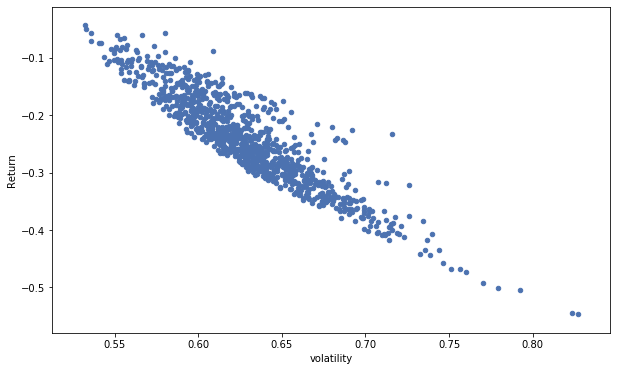

In [98]:
portfolios.plot(x='volatility',y='Return',kind='scatter',figsize=(10,6))
plt.xlabel('volatility')
plt.ylabel('Return')

## Efficient Frontier Using CLA Algorithm

In [99]:
df3.head()

,Return_MS,Return_Citi,Return_JPM,Return_GS
Date,,,,
2007-03-01,NaN,NaN,NaN,NaN
2007-04-01,0.003547,-0.003445,0.002493,-0.009360
2007-05-01,-0.012902,-0.005281,-0.008335,0.001005
2007-08-01,0.006042,0.005099,0.003342,0.023240
2007-09-01,-0.002338,-0.008758,-0.004180,0.001717


In [100]:
df6.tail()

,Return_MS,Return_Citi,Return_JPM,Return_GS
Date,,,,
2008-12-24,0.004147,0.039103,0.025103,0.016355
2008-12-26,0.010292,-0.007402,-0.001676,-0.006168
2008-12-29,0.016921,-0.024061,-0.000671,0.007736
2008-12-30,0.019276,0.034409,0.040473,0.069376
2008-12-31,0.054448,-0.013324,0.016630,0.027998


In [101]:
df_mean = np.array(df6.mean())

In [102]:
df4.tail()

,Close_MS,Close_Citi,JPM_Close,GS_Close
Date,,,,
2010-12-23,27.410000,46.799999,42.080002,167.600006
2010-12-27,27.510000,47.700001,42.669998,169.830002
2010-12-28,27.660000,47.799999,42.610001,169.190002
2010-12-29,27.280001,47.700001,42.360001,167.630005
2010-12-30,27.330000,47.599998,42.230000,167.639999


In [103]:
df8=df4.loc['2007-03-01':'2008-12-31']

In [104]:
df8.tail()

,Close_MS,Close_Citi,JPM_Close,GS_Close
Date,,,,
2008-12-24,14.500000,67.800003,29.850000,76.440002
2008-12-26,14.650000,67.300003,29.799999,75.970001
2008-12-29,14.900000,65.699997,29.780001,76.559998
2008-12-30,15.190000,68.000000,31.010000,82.059998
2008-12-31,16.040001,67.099998,31.530001,84.389999


In [105]:
e_cov_during = np.array(CovarianceShrinkage(df8).ledoit_wolf())

In [106]:
type(e_cov_during)

numpy.ndarray

In [107]:
returns_during = np.array(df6.mean())

In [108]:
from pypfopt import CLA

In [109]:
efficient_portfolio_during = CLA(returns_during, e_cov_during)

In [110]:
print(efficient_portfolio_during.min_volatility())

{0: 0.0, 1: 0.0, 2: 0.4814250629859924, 3: 0.5185749370140076}


In [111]:
# Compute the efficient frontier
(ret, vol, weights) = efficient_portfolio_during.efficient_frontier()

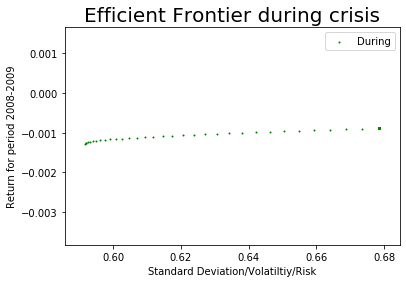

In [112]:
# Add the frontier to the plot showing the 'before' and 'after' frontiers
plt.xlabel('Standard Deviation/Volatiltiy/Risk')
plt.ylabel('Return for period 2008-2009')
plt.title('Efficient Frontier during crisis',size=20)
plt.scatter(vol, ret, s = 4, c = 'g', marker = '.', label = 'During')
plt.legend()
plt.show()

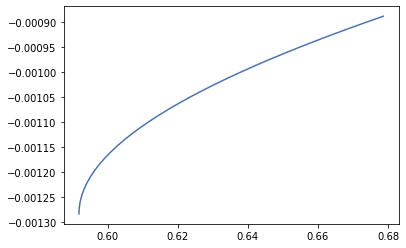

In [113]:
plt.plot(vol,ret)

In [114]:
df9=df4.loc['2009-01-01':'2010-12-31']  # for covariance matrix (prices)
df10=df3.loc['2009-01-01':'2010-12-31'] # returns


In [115]:
returns_after = np.array(df10.mean())
print(returns_after)

[ 0.00105944 -0.00068261  0.0005809   0.00136455]


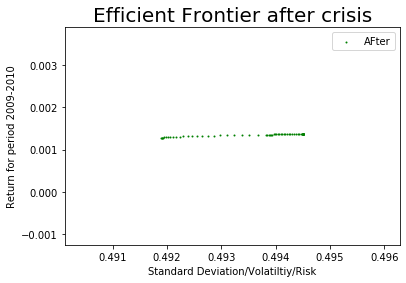

In [116]:
e_cov_after = np.array(CovarianceShrinkage(df9).ledoit_wolf())
efficient_portfolio_after = CLA(returns_after, e_cov_after)
(ret, vol, weights) = efficient_portfolio_after.efficient_frontier()
# Add the frontier to the plot showing the 'before' and 'after' frontiers

plt.xlabel('Standard Deviation/Volatiltiy/Risk')
plt.ylabel('Return for period 2009-2010')
plt.title('Efficient Frontier after crisis',size=20)
plt.scatter(vol, ret, s = 4, c = 'g', marker = '.', label = 'AFter')
plt.legend()
plt.show()

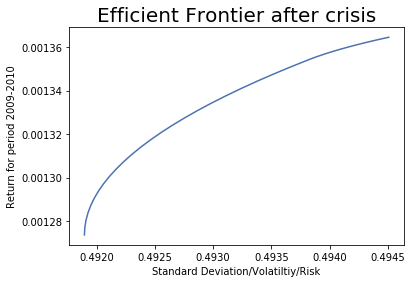

In [117]:
plt.xlabel('Standard Deviation/Volatiltiy/Risk')
plt.ylabel('Return for period 2009-2010')
plt.title('Efficient Frontier after crisis',size=20)
plt.plot(vol,ret)

In [118]:
## Risk reduced after crisis

### Portfolio Optimization

In [135]:
df_returns = df1[['Return_MS','Return_Citi','Return_JPM','Return_GS']]

In [136]:
df_returns.head(10)

,Return_MS,Return_Citi,Return_JPM,Return_GS
Date,,,,
2007-03-01,NaN,NaN,NaN,NaN
2007-04-01,0.003547,-0.003445,0.002493,-0.009360
2007-05-01,-0.012902,-0.005281,-0.008335,0.001005
2007-08-01,0.006042,0.005099,0.003342,0.023240
2007-09-01,-0.002338,-0.008758,-0.004180,0.001717
2007-10-01,0.005039,-0.008096,0.007303,0.019555
2007-11-01,0.009760,0.000739,0.004356,0.017953
2007-12-01,0.005931,0.003869,-0.006646,0.009909
2007-01-16,-0.003022,0.007146,0.008300,-0.001871


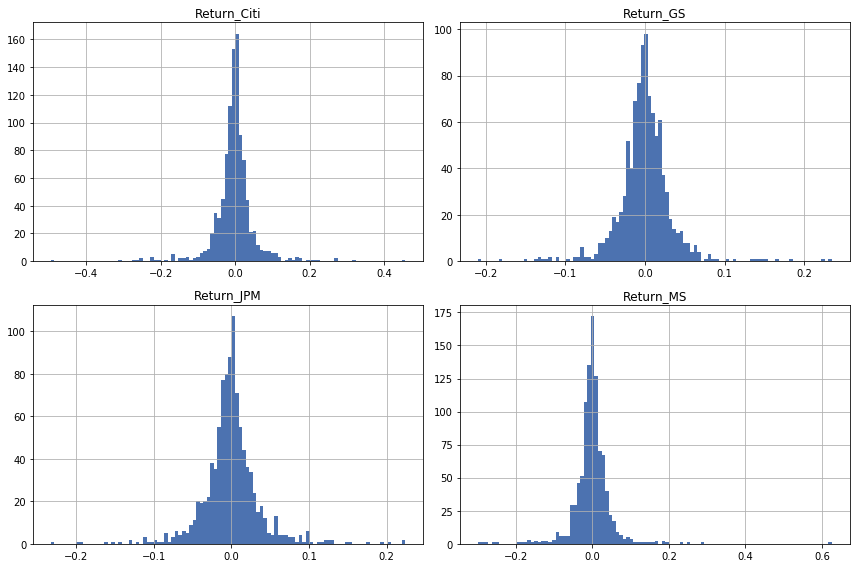

In [137]:
df_returns.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [138]:
df_returns.mean()

Return_MS     -0.001088
Return_Citi   -0.002437
Return_JPM    -0.000129
Return_GS     -0.000179
dtype: float64

In [140]:
df_returns.cov()*252

,Return_MS,Return_Citi,Return_JPM,Return_GS
Return_MS,0.632212,0.427139,0.312773,0.350865
Return_Citi,0.427139,0.784763,0.385937,0.305634
Return_JPM,0.312773,0.385937,0.376631,0.243584
Return_GS,0.350865,0.305634,0.243584,0.298430


## Optimization using Monte Carlo Simulation (Random Weights)

In [144]:
np.random.seed(101)
print(df1.columns)
rand_weights = np.array(np.random.rand(4))
print('Random Weights : ',rand_weights)
## To make sum of random weights equal to 1 , divide each random generated weight by sum
print('Rebalance')
weights = rand_weights/np.sum(rand_weights)
print(weights)

Index(['Close_MS', 'Close_Citi', 'JPM_Close', 'GS_Close', 'Return_MS',
       'Return_Citi', 'Return_JPM', 'Return_GS'],
      dtype='object')
Random Weights :  [0.51639863 0.57066759 0.02847423 0.17152166]
Rebalance
[0.40122278 0.44338777 0.02212343 0.13326603]


In [153]:
## Yearly portfolio expected return
exp_ret = np.sum(df_returns.mean()*weights*252)
exp_ret

-0.3889862858815879

In [154]:
## Portfolio Volatility Yearly
exp_vol = np.sqrt(np.dot(weights.T,np.dot(df_returns.cov()*252,weights)))
exp_vol

0.7083152895453855

In [156]:
## Sharpe Ratio
sr = exp_ret/exp_vol
print('Sharpe Ratio :',sr)

Sharpe Ratio : -0.549171098835448


In [158]:
## Final code for monte carlo
np.random.seed(101)
num_ports = 10000
all_weights = np.zeros((num_ports,len(df_returns.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    rand_weights = np.array(np.random.rand(4))
    ## To make sum of random weights equal to 1 , divide each random generated weight by sum
    weights = rand_weights/np.sum(rand_weights)
    all_weights[ind,:] = weights
    ## Yearly portfolio expected return
    ret_arr[ind] = np.sum(df_returns.mean()*weights*252)
    ## Portfolio Volatility Yearly
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(df_returns.cov()*252,weights)))
    ## Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [160]:
sharpe_arr.argmax()

7872

In [161]:
all_weights[7872,:]

array([0.01225268, 0.00812669, 0.74934034, 0.2302803 ])

In [163]:
max_sr_ret = ret_arr[7872]
max_sr_vol = vol_arr[7872]

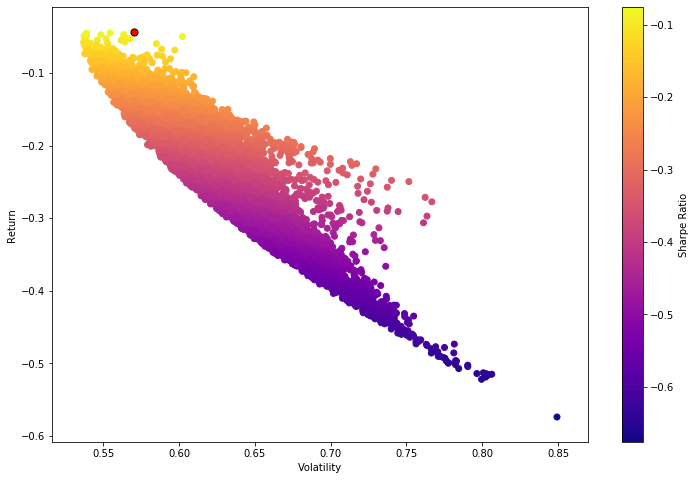

In [165]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

# Var(Value at Risk) of a Normal Distribution

In [119]:
from scipy.stats import norm

95% VaR:  1.6448536269514722 ; 99% VaR:  2.338794665787308


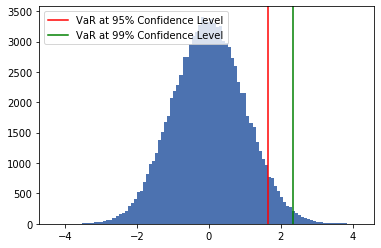

In [120]:
# Var of a Normal Distribution
# Create the VaR measure at the 95% confidence level using norm.ppf()
VaR_95 = norm.ppf(0.95)

# Create the VaR meaasure at the 5% significance level using numpy.quantile()
draws = norm.rvs(size = 100000)
VaR_99 = np.quantile(draws, 0.99)

# Compare the 95% and 99% VaR
print("95% VaR: ", VaR_95, "; 99% VaR: ", VaR_99)

# Plot the normal distribution histogram and 95% VaR measure
plt.hist(draws, bins = 100)
plt.axvline(x = VaR_95, c='r', label = "VaR at 95% Confidence Level")
plt.axvline(x = VaR_99, c='g', label = "VaR at 99% Confidence Level")

plt.legend(); plt.show()

## CVAR of a Normal Distribution

In [121]:
df.head()

,returns
Date,
2007-03-01,NaN
2007-04-01,-0.001691
2007-05-01,-0.006378
2007-08-01,0.009431
2007-09-01,-0.003390


In [122]:
prtfolio_losses = df[(df['returns']< 0)== True]

In [123]:
prtfolio_losses.head()

,returns
Date,
2007-04-01,-0.001691
2007-05-01,-0.006378
2007-09-01,-0.003390
2007-01-17,-0.002653
2007-01-18,-0.009223


In [124]:
prtfolio_losses.describe()

,returns
count,523.000000
mean,-0.023568
std,0.029734
min,-0.222164
25%,-0.029437
50%,-0.013916
75%,-0.005640
max,-0.000019


In [125]:
df.describe()

,returns
count,1006.000000
mean,-0.000958
std,0.039036
min,-0.222164
25%,-0.015012
50%,-0.000807
75%,0.013192
max,0.292792


In [126]:
df.head(10)

,returns
Date,
2007-03-01,NaN
2007-04-01,-0.001691
2007-05-01,-0.006378
2007-08-01,0.009431
2007-09-01,-0.003390
2007-10-01,0.005950
2007-11-01,0.008202
2007-12-01,0.003266
2007-01-16,0.002638


In [127]:
# Compute the mean and variance of the portfolio returns
pm = portfolio_returns.iloc[1:].mean()
ps = portfolio_returns.iloc[1:].std()

# Compute the 95% VaR using the .ppf()
VaR_95 = norm.ppf(0.95, loc = pm, scale = ps)
# Compute the expected tail loss and the CVaR in the worst 5% of cases
tail_loss = norm.expect(lambda x: x, loc = pm, scale = ps, lb = VaR_95)
CVaR_95 = (1 / (1 - 0.95)) * tail_loss

# Plot the normal distribution histogram and add lines for the VaR and CVaR
plt.hist(norm.rvs(size = 100000, loc = pm, scale = ps), bins = 100)
plt.axvline(x = VaR_95, c='r', label = "VaR, 95% confidence level")
plt.axvline(x = CVaR_95, c='g', label = "CVaR, worst 5% of outcomes")
plt.legend(); plt.show()

AttributeError: 'list' object has no attribute 'iloc'

In [143]:
# Import the EfficientFrontier class
from pypfopt.efficient_frontier import EfficientFrontier

# Import the negative_cvar objective function
from pypfopt.objective_functions import L2_reg

In [144]:
returns

,Return_MS,Return_Citi,Return_JPM,Return_GS
Date,,,,
2007-03-01,NaN,NaN,NaN,NaN
2007-04-01,0.003547,-0.003445,0.002493,-0.009360
2007-05-01,-0.012902,-0.005281,-0.008335,0.001005
2007-08-01,0.006042,0.005099,0.003342,0.023240
2007-09-01,-0.002338,-0.008758,-0.004180,0.001717
...,...,...,...,...
2010-12-23,0.000365,-0.010627,-0.001899,-0.011863
2010-12-27,0.003642,0.019048,0.013923,0.013218
2010-12-28,0.005438,0.002094,-0.001407,-0.003776


In [146]:
e_cov

{'during':             Close_MS  Close_Citi  JPM_Close  GS_Close
 Close_MS    0.994390    0.465336   0.298613  0.434874
 Close_Citi  0.465336    0.713035   0.364848  0.323977
 JPM_Close   0.298613    0.364848   0.422516  0.224668
 GS_Close    0.434874    0.323977   0.224668  0.408773,
 'after':             Close_MS  Close_Citi  JPM_Close  GS_Close
 Close_MS    0.388839    0.344939   0.279727  0.231624
 Close_Citi  0.344939    0.841156   0.356788  0.252684
 JPM_Close   0.279727    0.356788   0.382494  0.223740
 GS_Close    0.231624    0.252684   0.223740  0.244539}

In [147]:
# Create the efficient frontier instance
ef = EfficientFrontier(None, covar_ann)

# Find the cVar-minimizing portfolio weights at the default 95% confidence level
optimal_weights = ef.custom_objective(L2_reg, returns)

# Display the optimal weights
print(optimal_weights)

C:\Users\TAN\Anaconda3\lib\site-packages\pypfopt\efficient_frontier.py:98: UserWarning:

No expected returns provided. You may only use ef.min_volatility()



AttributeError: 'EfficientFrontier' object has no attribute 'custom_objective'

# Parametric Estimation VaR

# Finding best parameters (Theta - Mean and SD) given portfolio data is called Parametric Estimation

In [41]:
# In Parameter Estimation VaR, loss distribution is not given, thereby we fit different distribution and with the help of 
# Anderson Darling test we check goodness of fit.

In [68]:
from scipy.stats import norm,anderson

In [43]:
#new = filter(lambda x: x < 0, portfolio_returns)

In [44]:
#les = []
#for i in new:
#    les.append(i)

In [45]:
#losses = pd.DataFrame(les)

In [46]:
df.head(3)

,returns
Date,
2008-03-01,0.005552
2008-04-01,-0.037493
2008-07-01,-0.017465


In [47]:
df_losses = - df

In [48]:
df_losses.head(10)

,returns
Date,
2008-03-01,-0.005552
2008-04-01,0.037493
2008-07-01,0.017465
2008-08-01,0.029839
2008-09-01,-0.005989
2008-10-01,-0.015516
2008-11-01,0.006020
2008-01-14,-0.029620
2008-01-15,0.055936


In [49]:
params = norm.fit(df_losses)

In [50]:
VaR_95 = norm.ppf(0.95,*params)
print("VaR for 95% confidence interval using parameter estimation is",VaR_95)

VaR for 95% confidence interval using parameter estimation is 0.07094514881998516


In [51]:
print('anderson darling test',anderson(df_losses['returns']))

anderson darling test AndersonResult(statistic=14.490773021032055, critical_values=array([0.572, 0.651, 0.781, 0.911, 1.083]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [52]:
# Test statistic value of 14.49 from the goodness of fit Anderson Darling fit is greater than the critical value of 1.083 it means that
# losses are not normally distributed as the critical value exceeeds the 99% conidence interval

# Definition wiki - anderson
#In many cases (but not all), you can determine a p value for the Anderson-Darling statistic and use that value to help you 
#determine if the test is significant are not. Remember the p ("probability") value is the probability of getting a result 
##that is more extreme if the null hypothesis is true. If the p value is low (e.g., <=0.05), you conclude that the data do 
#not follow the normal distribution. Remember that you chose the significance level even though many people just use 0.05 
#the vast majority of the time. We will look at two different data sets and apply the Anderson-Darling test to both sets.



In [53]:
from scipy.stats import skewnorm,skewtest

In [54]:
params_skewed = skewnorm.fit(df_losses)

In [55]:
VaR_95_Skewnorm = skewnorm.ppf(0.95,*params_skewed)

In [56]:
print('VaR 95 for considerling losses as skewnorm distribution',VaR_95_Skewnorm)

VaR 95 for considerling losses as skewnorm distribution 0.06434919304433127


In [57]:
print("Skewtest result: ", skewtest(df_losses))

Skewtest result:  SkewtestResult(statistic=array([-10.48758803]), pvalue=array([9.85110257e-26]))


In [58]:
#Nice. Note that although the VaR estimate for the 
#Normal distribution from the previous exercise is larger than the skewed Normal distribution estimate, the Anderson-Darling 
#and skewtest results show the Normal distribution estimates cannot be relied upon. Skewness matters for loss distributions, 
#and parameter estimation is one way to quantify this important feature of the financial crisis.

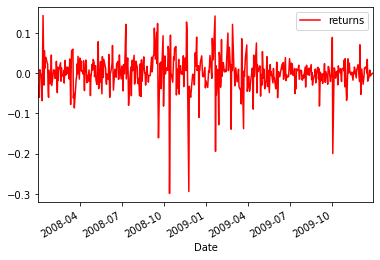

In [59]:
df_losses.plot(color = 'Red')

In [60]:
import matplotlib.pyplot as plt

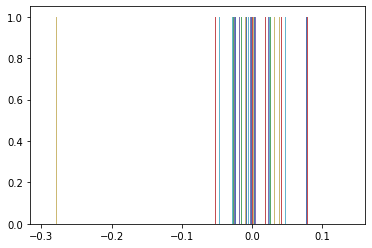

In [61]:
plt.hist(df_losses)
plt.show()

# Historical Simulation
# EXAMPLE
#weights = [0.25, 0.25, 0.25, 0.25]
#portfolio_returns = asset_returns.dot(weights)
#losses = - portfolio_returns
#VaR_95 = np.quantile(losses, 0.95)

In [62]:
#Historical simulation: use past to predict future
#No distributional assumption required
#Data about previous losses become simulated losses for tomorrow

In [63]:
VaR_95_HS = np.quantile(df_losses,0.95)

In [64]:
print(VaR_95_HS)

0.061718355677259654


# monte carlo simulation VaR_95 

In [65]:
returns.head(2)

,Adj Close Citi,Adj Close GS,Adj Close JPM,Adj Close_MS
Date,,,,
2008-03-01,0.000346,-0.013294,0.035354,-0.000197
2008-04-01,-0.023851,-0.023970,-0.069955,-0.032194


In [66]:
# Monte Carlo Simulation
N = 10000
total_steps = 1440
e_cov = returns.cov()

In [67]:
#Covariance Matrix
print(e_cov)

                Adj Close Citi  Adj Close GS  Adj Close JPM  Adj Close_MS
Adj Close Citi        0.005866      0.002279      -0.000094      0.003270
Adj Close GS          0.002279      0.001990      -0.000185      0.002621
Adj Close JPM        -0.000094     -0.000185       0.001767     -0.000221
Adj Close_MS          0.003270      0.002621      -0.000221      0.005164


In [68]:
mu = np.mean(returns
print(mu)

SyntaxError: invalid syntax (<ipython-input-68-26d8d2402902>, line 2)

In [ ]:
mu = [[-0.001412],[0.000579],[0.000937],[0.001331]]
mu1 = np.matrix(mu)

In [ ]:
print(mu1)

In [ ]:
daily_loss = np.zeros((4,N))
# Create the Monte Carlo simulated runs
for n in range(N):
    # Compute simulated path of length total_steps for correlated returns
    correlated_randomness = e_cov @ norm.rvs(size = (4,total_steps))
    steps = 1/total_steps
    minute_losses = mu1 *  steps + correlated_randomness * np.sqrt(steps)
    daily_loss[:, n] = minute_losses.sum(axis=1)

In [ ]:
VaR_95 = np.quantile(daily_loss,0.95)

In [ ]:
print("VaR with 95% condidence interval for 4 major investment banks at the time of financial crisis using Monte Carlo Simulation is \n", VaR_95)

In [ ]:
#Ordinary Least Square
#Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line.

# Structural Breaks - Do from Data Camp

In [ ]:
#Chow Test = Whether or not a structural break has occured in the data
# Visualization cannot determine exact structural break in the data
#Alternative - Time of structural break concides with time of increasing volatility
#Stochastic Volatility Model : Volatility can be analyzed statistically through the random probability distribution but
# cannot be predicted precisely


In [ ]:
# To check if the volatility is non stationary rolling window volatility is calculated


In [ ]:
df.head(10)

In [ ]:
roll = df.rolling(30)

In [ ]:
type(roll)

In [ ]:
volatility = roll.std().dropna()

In [ ]:
volatility.plot(color='red').set_ylabel("Losses")

In [ ]:
df.returns.rolling(10).std()

In [ ]:
# VaR and CVaR estimates that data distribution is same throughout (Stationarity Assumption) but there are structural breaks
# in between.

# So Assume specific points in time for change
# Break up data into sub-periods
# Within each sub-period, assume stationarity

# Chow TEST: Test for evidence of structural breaks
#     1. Null hypothesis - No break
#     2. Requires three OLS regressions
#     3. Regression for entire period
#     4. Two regressions, before and after break
#     5. Collect sum-of-squared residuals
#     6. Test statistic is distributed according to "F" distribution
    
# Noe sometimes it is not easy to visualize the losses to detect the structural break
# Sometimes we can use Rolling window volatility to visualize the rolling volatity in the given time period

# std() calculates a single value of volatility
# rolling.std calculates rolling volatility and you can plot and see the structural break

# # Backtesting - from datacamp
# #Backtesting is the process of applying a trading strategy or analytical method to historical data to see how accurately
# #the strategy or method would have predicted actual results.